<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **3.7.1. Mathematical formulation**

Neural networks consist of interconnected layers of nodes (or "neurons"). Each neuron takes in input data, applies a weight to it, adds a bias, and produces an output. This process is represented mathematically as: $y=\sigma (W \cdot x+b)$ where:

- $W$ is the weight matrix
- $x$ is the input
- $b$ is the bias
- $\sigma$ is the activation function that adjusts the output, often giving non-linear properties.

In a network with multiple layers, each layer's output becomes the input for the next, enabling complex data transformations.

The examples below demonstrate the mathematical structure of a simple neural network with two input nodes, weights, biases, and output.

Example 1: Forward Pass for Single-Layer Perceptron

In [ ]:
# Inputs
x = np.array([0.5, -0.3])  # Two input features

# Weights and bias
weights = np.array([0.7, -0.8])
bias = 0.1

# Output calculation (before activation)
z = np.dot(weights, x) + bias
print("Weighted Sum (z):", z)


Weighted Sum (z): 0.69


Example 2: Forward Pass with Multiple Layers

In [ ]:
# Inputs for 2-layer network
x = np.array([0.6, -0.1])

# Weights and biases
weights_l1 = np.array([[0.2, -0.3], [0.5, 0.1]])
biases_l1 = np.array([0.1, 0.2])
weights_l2 = np.array([0.4, -0.6])
bias_l2 = 0.3

# Layer 1
z1 = np.dot(weights_l1, x) + biases_l1
a1 = np.tanh(z1)

# Layer 2 (output layer)
z2 = np.dot(weights_l2, a1) + bias_l2
output = 1 / (1 + np.exp(-z2))  # Sigmoid activation
print("Network Output:", output)


Network Output: 0.5313183469832072


# **3.7.2. Activation functions**

According to the class notes, in neural networks, the activation function of a node abstracts the output of that node given an input or set of inputs for specific purposes for example, classification. In biological neural networks, the activation function may rep- resent an electrical signal wether if the neuron fires. We use $\sigma$ to represent the activation functions.

Activation functions introduce non-linearity to a neural network, allowing it to model complex relationships. Here’s a quick overview of the main activation functions:

- **Step Function:** Outputs a binary value (0 or 1) based on whether the input is positive or negative. This function is simple and suitable for binary classification tasks but is rarely used in deep networks due to its lack of gradient (which is needed for backpropagation).

- **ReLU (Rectified Linear Unit):** Outputs the input if it’s positive; otherwise, it outputs zero. This function helps mitigate the vanishing gradient problem, making it popular in deep networks, especially for hidden layers.

- **Sigmoid Function:** Maps values between 0 and 1, often used for binary classification or as the final activation in probability-based tasks. It has a smooth gradient, but it can suffer from vanishing gradients for large or small inputs.

- **Softmax Function:** Converts a vector of values into probabilities that sum to 1, making it ideal for multi-class classification tasks. Each output represents the probability of the input belonging to a specific class.

Each of these functions plays a distinct role depending on the structure of the network and the problem it is solving. Activation functions like ReLU and Sigmoid are commonly used in hidden layers, while Softmax is typically used in the output layer of a multi-class classification network.

The example below illustrates these activation functions with their visualizations.

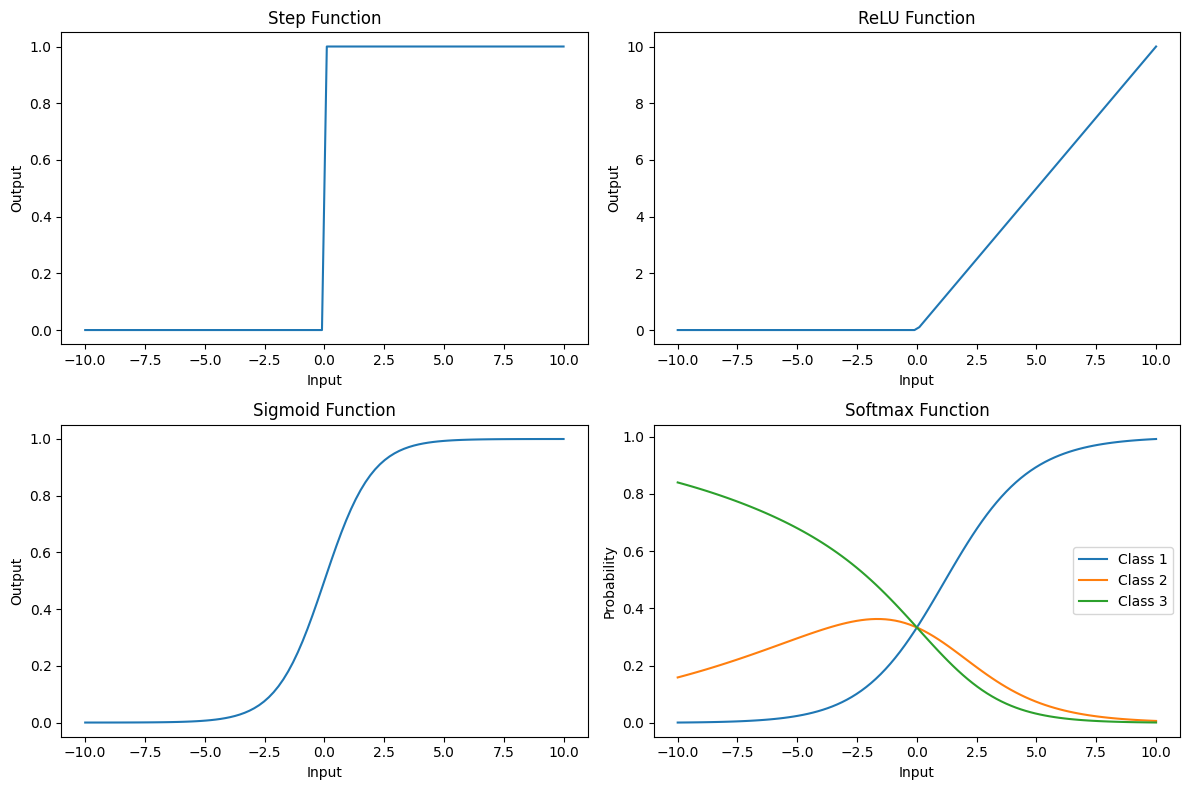

In [ ]:
# Define the activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # for numerical stability
    return exp_x / exp_x.sum(axis=0)

# Plotting the activation functions
x = np.linspace(-10, 10, 100)

# Step Function
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, step_function(x))
plt.title("Step Function")
plt.xlabel("Input")
plt.ylabel("Output")

# ReLU Function
plt.subplot(2, 2, 2)
plt.plot(x, relu(x))
plt.title("ReLU Function")
plt.xlabel("Input")
plt.ylabel("Output")

# Sigmoid Function
plt.subplot(2, 2, 3)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Output")

# Softmax Function (for illustrative purposes)
x_multi = np.array([x, x/2, x/3])  # simulate multi-class input for softmax
softmax_output = softmax(x_multi)
plt.subplot(2, 2, 4)
plt.plot(x, softmax_output[0], label="Class 1")
plt.plot(x, softmax_output[1], label="Class 2")
plt.plot(x, softmax_output[2], label="Class 3")
plt.title("Softmax Function")
plt.xlabel("Input")
plt.ylabel("Probability")
plt.legend()

plt.tight_layout()
plt.show()


# **3.7.3. Cost function**

Cost functions measure the error between the network's predictions and the actual target values, guiding the optimization process. Here are the key cost functions:

- **Binary Cross-Entropy:** Often used for binary classification tasks. It calculates the difference between the true label and the predicted probability for each example, penalizing predictions further from the actual label. The formula is: $\textrm{Loss}_{BCE} = - \frac{1}{N} \sum^{N}_{i=1} (y_i log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i})$ where $y_i$ are the true labels, and $\hat{y}_i$ are the predicted probabilities. This loss is commonly used in binary classification since it handles probabilities well and helps models converge toward accurate classifications.

- **Mean Squared Error (MSE):** Commonly used for regression tasks. MSE computes the average of squared differences between the predicted and actual values, with larger errors penalizing more heavily due to squaring. The formula is: $Loss_{MSE} = \frac{1}{N} \sum^{N}_{i=1} (y_i - \hat{y}_i)^{2}$ where $y_i$ is the actual value, and $\hat{y}_i$ is the prediction. This loss function is well-suited for regression because it provides smooth gradients, making optimization straightforward.

Both of these cost functions play essential roles in training neural networks, helping adjust the weights to minimize error and improve prediction accuracy. Binary cross-entropy is particularly valuable in classification, while MSE remains a staple in continuous output problems like regression.

The examples below demonstrate the binary cross-entropy loss, commonly used for binary classification, and mean squared error (MSE) for regression tasks.

In [ ]:
# Example predictions and true labels for binary classification
y_true = np.array([1, 0, 1, 1])  # True labels
y_pred = np.array([0.9, 0.2, 0.7, 0.8])  # Predicted probabilities

# Binary Cross-Entropy Loss function
def binary_cross_entropy(y_true, y_pred):
    # Ensuring numerical stability with np.clip
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Calculate the binary cross-entropy loss
loss_bce = binary_cross_entropy(y_true, y_pred)
print("Binary Cross-Entropy Loss:", loss_bce)


Binary Cross-Entropy Loss: 0.22708064055624455


In [ ]:
# Example predictions and true values for regression
y_true_regression = np.array([2.5, 0.0, 2.1, 1.8])  # True values
y_pred_regression = np.array([2.3, 0.1, 2.0, 1.7])  # Predicted values

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate the MSE
loss_mse = mean_squared_error(y_true_regression, y_pred_regression)
print("Mean Squared Error:", loss_mse)


Mean Squared Error: 0.017500000000000026


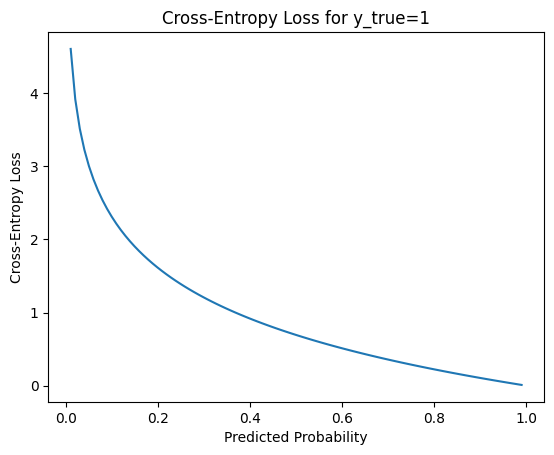

In [ ]:
# Range of predictions for a single true label
y_pred_range = np.linspace(0.01, 0.99, 100)
y_true_val = 1  # Example for true label being 1

# Calculate loss values
loss_vals = [binary_cross_entropy(np.array([y_true_val]), np.array([p])) for p in y_pred_range]

# Plot Cross-Entropy Loss
plt.plot(y_pred_range, loss_vals)
plt.xlabel("Predicted Probability")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss for y_true=1")
plt.show()


# **3.7.4. Backpropagation**

The class notes state that back-propagation is the essence of neural network training. It is the practice of fine-tuning the weights of a neural network based on the error rate (i.e. loss) obtained in the previous iteration. Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization. We want to minimize the cost function, $J$ , with respect to the parameters, the components of $W$ and $b$.

To do that using gradient descent we are going to need the derivatives of $J$ with respect to each of those parameters.  Using the chain rule, it finds gradients (slopes) for each weight and bias, indicating how they should be adjusted to reduce error. The steps:

1. Calculate the loss.
2. Propagate the error backward through the network, adjusting weights and biases along the way.

The example below implements the backpropagation process on a simple neural network to compute gradients of weights and biases.

In [ ]:
# Inputs, weights, and bias
x = np.array([0.5, -0.4])
weights = np.array([0.6, -0.7])
bias = 0.2
y_true = 1  # Target output

# Forward pass
z = np.dot(weights, x) + bias
y_pred = 1 / (1 + np.exp(-z))  # Sigmoid activation

# Backpropagation
error = y_pred - y_true
d_loss_dz = error * y_pred * (1 - y_pred)  # Derivative of loss w.r.t. z
d_loss_dw = d_loss_dz * x                 # Gradient w.r.t. weights
d_loss_db = d_loss_dz                     # Gradient w.r.t. bias
print("Gradient w.r.t. weights:", d_loss_dw)
print("Gradient w.r.t. bias:", d_loss_db)


Gradient w.r.t. weights: [-0.03387157  0.02709725]
Gradient w.r.t. bias: -0.06774313189058315


# **3.7.5. Backpropagation algorithm**

The full backpropagation algorithm iteratively updates weights and biases to minimize the loss:

1. **Forward pass:** Calculate the output and the error (loss).
2. **Backward pass:** Compute gradients for weights and biases.
3. **Update weights:** Adjust weights and biases using these gradients and a learning rate, a small factor controlling how much to change them at each step.

The example below represents a complete example of training a simple neural network using backpropagation, demonstrating weight updates across epochs.

In [ ]:
# Parameters
x = np.array([0.5, -0.3])  # Single input sample
y_true = 1                 # Target output
weights = np.array([0.7, -0.8])
bias = 0.1
learning_rate = 0.01

# Training loop
for epoch in range(100):
    # Forward pass
    z = np.dot(weights, x) + bias
    y_pred = 1 / (1 + np.exp(-z))

    # Backpropagation
    error = y_pred - y_true
    d_loss_dz = error * y_pred * (1 - y_pred)
    d_loss_dw = d_loss_dz * x
    d_loss_db = d_loss_dz

    # Update weights and bias
    weights -= learning_rate * d_loss_dw
    bias -= learning_rate * d_loss_db

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.40651526920662473
Epoch 10, Loss: 0.4032149760772744
Epoch 20, Loss: 0.39996869270747154
Epoch 30, Loss: 0.39677528775321846
Epoch 40, Loss: 0.3936336544872357
Epoch 50, Loss: 0.3905427104302387
Epoch 60, Loss: 0.38750139697085645
Epoch 70, Loss: 0.38450867897596863
Epoch 80, Loss: 0.38156354439311024
Epoch 90, Loss: 0.378665003846458
